<a href="https://colab.research.google.com/github/Mainabryan/Employee-Salary-Prediction-using-Linear-Regression/blob/main/salary_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LINEAR REGRESSION

# import the necessary files

supervised learning algorithm used for predicting numerical values based on input data.

 It assumes a linear relationship between the independent variable (input) and the dependent variable (output).

 The goal is to find the best-fitting straight line that represents the relationship between the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression

from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Prepare the data

In [2]:
data=pd.read_csv('/content/Salary_Data.xls')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [5]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


#detect outliers

In [6]:
data.skew()

,0
YearsExperience,0.37956
Salary,0.35412


##Find the correlation

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#visualization

<function matplotlib.pyplot.show(close=None, block=None)>

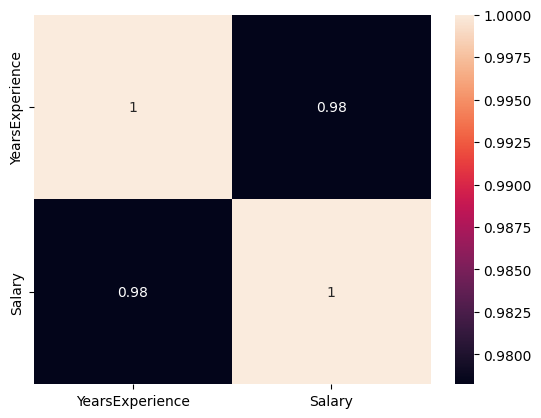

In [8]:
sns.heatmap(data.corr(),annot=True)
plt.show

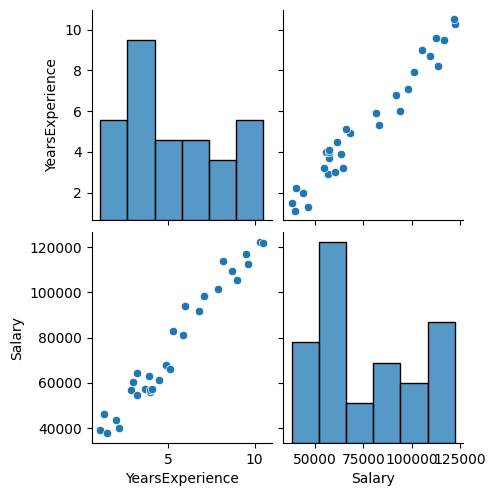

In [9]:
sns.pairplot(data)

#As years of experience increases, salary increases — and they move together in a very predictable way.

# PREPARE THE DATA

In [17]:
x= data.drop('Salary',axis = 1)

In [19]:
y = data['Salary']

In [22]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [24]:
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


# Spliting the data

In [25]:


from sklearn.model_selection import train_test_split



In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
print(x_train.shape)

(24, 1)


In [29]:
print(x_test.shape)

(6, 1)


In [31]:
print(x.shape)

(30, 1)


## Model fitting

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()   # You create the model
# Use x_train and y_train for fitting the model
model.fit(x_train, y_train)              # This is where it LEARNS (fitting!)

LinearRegression()

In [36]:
model.coef_

array([9312.57512673])

# Prediction

In [38]:
y_pred=model.predict(x_test)

In [39]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [40]:
y_test

,Salary
2,37731
28,122391
13,57081
10,63218
26,116969
24,109431


## Evaluation

In [42]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)



Mean Absolute Error (MAE): 2446.1723690465055
Mean Squared Error (MSE): 12823412.298126549
R² Score: 0.988169515729126


#

##Visualization

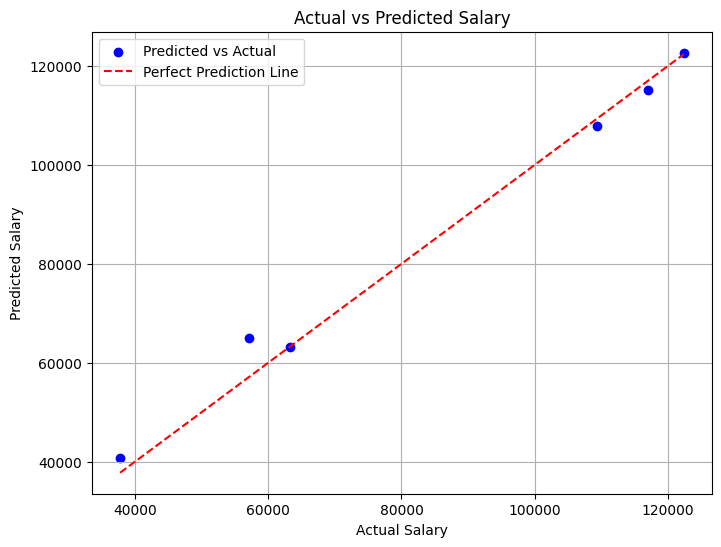

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()
